<a href="https://colab.research.google.com/github/TakehikoEsaka/ig_api/blob/main/ig_graph_api_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests as re
%matplotlib inline

In [2]:
# ここにIDとアクセストークンを定義
user_id = "17841406973263608"
access_token = "EAAElAXNNcb8BABgtGt9ThGJX9GFBQcF5NwZBeyhYVMJvSZA7AhoRWcAM8ObAH4ZCIAXQ6NEebFegM63KUFUV1XR89jou3ZBcGEkOhQEzZB9HaTjXodX9E7BQBREYiSI4BWpbfhU6c1sE6ZCraB3T9mhPOfOnsMkJMl7QRRPPrqYBZCRlBpCgZBWS"

In [42]:
def get_hashtag_id(access_token, user_id, q):
  url = "https://graph.facebook.com/v11.0/ig_hashtag_search"
  payload = {"user_id" : user_id, "q" : q, "access_token" : access_token}
  r = re.get(url, params = payload)
  ig_hashtag_id = r.json()["data"][0]["id"]
  print("#{0} id :{1}".format(q, ig_hashtag_id))
  return ig_hashtag_id

In [57]:
def get_df(access_token, user_id, ig_hashtag_id, fields):
  url = "https://graph.facebook.com/{0}/recent_media".format(ig_hashtag_id)
  payload = {"user_id" : user_id, "fields" : fields, "access_token" : access_token}
  r = re.get(url, params = payload).json()
  df = pd.io.json.json_normalize(r["data"])
  
  # while True:
  for i in range(5):
    try:
      next_url = r["paging"]["next"]
      print(r["paging"])
      r = re.get(next_url).json()
      df_new = pd.io.json.json_normalize(r["data"])
      df = pd.concat([df, df_new], axis = 0)
    except:
      break
  
  return df

In [58]:
q = ["離乳食"]
# ハッシュタグIDを取得
ig_hashtag_id = get_hashtag_id(access_token, user_id, q)

# フィールド指定して情報GET 
fields = "id, media_type, timestamp, comments_count, like_count, permalink"
df = get_df(access_token, user_id, ig_hashtag_id, fields)
df.shape

#['離乳食'] id :17843847292028655


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


{'cursors': {'after': 'UVZAGRWNrZAG1kSGxYVVdaVFVYUXhNWFpUVEVSbE9UaFlNR1JwTWxselIwdFRjbFpmTjJaaVEydHZAWM0V6WW5OalZAXVXdOblF3YVdsTkxWa3pSMWt0VWtwYU9HTlZAkRVpEUkZAGaGJ6aDRVbmRLT1RCVFNGWkJhQT09'}, 'next': 'https://graph.facebook.com/v11.0/17843847292028655/recent_media?access_token=EAAElAXNNcb8BABgtGt9ThGJX9GFBQcF5NwZBeyhYVMJvSZA7AhoRWcAM8ObAH4ZCIAXQ6NEebFegM63KUFUV1XR89jou3ZBcGEkOhQEzZB9HaTjXodX9E7BQBREYiSI4BWpbfhU6c1sE6ZCraB3T9mhPOfOnsMkJMl7QRRPPrqYBZCRlBpCgZBWS&fields=id%2C+media_type%2C+timestamp%2C+comments_count%2C+like_count%2C+permalink&user_id=17841406973263608&limit=25&after=UVZAGRWNrZAG1kSGxYVVdaVFVYUXhNWFpUVEVSbE9UaFlNR1JwTWxselIwdFRjbFpmTjJaaVEydHZAWM0V6WW5OalZAXVXdOblF3YVdsTkxWa3pSMWt0VWtwYU9HTlZAkRVpEUkZAGaGJ6aDRVbmRLT1RCVFNGWkJhQT09'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


{'cursors': {'after': 'UVZAGRWFqazVUM1F4Tm1KMFVXNHpWVEJXZADJoUlRqaFVRbWRoYkV0VU5FcDFSR3d6TVVNd1gwVjNNbFpNVVRSb1ZAUWkJjM2RMWjNGa1JsOXdSa0p5ZAFhOallrMTNZAa2xDZAW1Sak1tSlJRbEpGVkRGRWVXSmtjQT09'}, 'next': 'https://graph.facebook.com/v11.0/17843847292028655/recent_media?access_token=EAAElAXNNcb8BABgtGt9ThGJX9GFBQcF5NwZBeyhYVMJvSZA7AhoRWcAM8ObAH4ZCIAXQ6NEebFegM63KUFUV1XR89jou3ZBcGEkOhQEzZB9HaTjXodX9E7BQBREYiSI4BWpbfhU6c1sE6ZCraB3T9mhPOfOnsMkJMl7QRRPPrqYBZCRlBpCgZBWS&fields=id%2C+media_type%2C+timestamp%2C+comments_count%2C+like_count%2C+permalink&user_id=17841406973263608&limit=25&after=UVZAGRWFqazVUM1F4Tm1KMFVXNHpWVEJXZADJoUlRqaFVRbWRoYkV0VU5FcDFSR3d6TVVNd1gwVjNNbFpNVVRSb1ZAUWkJjM2RMWjNGa1JsOXdSa0p5ZAFhOallrMTNZAa2xDZAW1Sak1tSlJRbEpGVkRGRWVXSmtjQT09'}
{'cursors': {'after': 'UVZAGRVJuQTJVR0ZA0VGsxVVQweDJNWEZANVWxadlptbHllbWRRTVhCVlUyMXVWVFo0TlRaYU5UUTNSRmhIUm1Ka1V6WndhRkpSUzNwTlRsUlFNVzFpVldjemFVUk5SVmxHUW5wQmIyVm5aWEI0WW5KaFdrMTRjUT09'}, 'next': 'https://graph.facebook.com/v11.0/17843847292

(150, 6)

In [62]:
df

,id,media_type,timestamp,comments_count,like_count,permalink
0,17915660692926493,IMAGE,2021-08-24T06:28:01+0000,0,0.0,https://www.instagram.com/p/CS8nQX2FByt/
1,18165957235087961,CAROUSEL_ALBUM,2021-08-24T06:27:57+0000,0,0.0,https://www.instagram.com/p/CS8nP1dlOrp/
2,18247868308007323,IMAGE,2021-08-24T06:27:18+0000,0,0.0,https://www.instagram.com/p/CS8nLD1lIMq/
3,17957139598480689,CAROUSEL_ALBUM,2021-08-24T06:27:14+0000,0,4.0,https://www.instagram.com/p/CS8nKnFJZIF/
4,17861665250602769,IMAGE,2021-08-24T06:27:08+0000,0,0.0,https://www.instagram.com/p/CS8nJ1oleXD/
...,...,...,...,...,...,...
20,17865057797589513,IMAGE,2021-08-24T04:43:23+0000,0,9.0,https://www.instagram.com/p/CS8bR-mlRGQ/
21,17990598628374751,IMAGE,2021-08-24T04:43:17+0000,0,5.0,https://www.instagram.com/p/CS8bRPJLSfS/
22,18240664840064251,IMAGE,2021-08-24T04:43:13+0000,0,3.0,https://www.instagram.com/p/CS8bQulLsjN/
23,17887722047313872,IMAGE,2021-08-24T04:42:55+0000,2,73.0,https://www.instagram.com/p/CS8bOj9l52X/


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

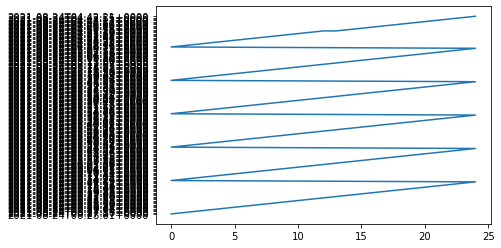

In [64]:
plt.plot(df["timestamp"])